In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
from PIL import Image
import textwrap

In [2]:
# Load the data
df = pd.read_csv('/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge03/data.csv')
df

,Group,Occupation,Percentage
0,Negroes,"Agriculture, Fisheries and Mining",62.0
1,Negroes,Manufacturing and Mechanical Industries,5.0
2,Negroes,Domestic and Personal Service,28.0
3,Negroes,Professions,0.8
4,Negroes,Trade and Transportation,4.5
5,Whites,"Agriculture, Fisheries and Mining",64.0
6,Whites,Manufacturing and Mechanical Industries,12.5
7,Whites,Domestic and Personal Service,5.5
8,Whites,Professions,4.0
9,Whites,Trade and Transportation,13.0


In [3]:
# Gather information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Group       10 non-null     object 
 1   Occupation  10 non-null     object 
 2   Percentage  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 368.0+ bytes


In [4]:
# Helper to calculate startangle
df.groupby(['Group'])['Percentage'].sum()

Group
Negroes    100.3
Whites      99.0
Name: Percentage, dtype: float64

In [5]:
# Calculate startangle: 360-(99+100.3)/2=80.35/2=40.175
startangle = 40.175

In [6]:
# Insert new rows at specific indexes
df.loc[4.5] = ['Negroes', 'bg', 80.35]
df.loc[9.5] = ['Whites', 'bg', 80.35]
df = df.sort_index().reset_index(drop=True)

In [7]:
# Define a custom color dictionary for each Occupation
color_dict = {
    'Agriculture, Fisheries and Mining': '#c50f2d',        # Red
    'Manufacturing and Mechanical Industries': '#5f73ab',  # Blue
    'Domestic and Personal Service': '#f4bf00',            # Yellow
    'Professions': '#aa8d6f',                              # Brown
    'Trade and Transportation': '#d5c8b4',                 # Light Brown
    'bg': '#e9ded0'                                        # Background
}

In [8]:
#  Sort the "Negros" group by "Percentage" in ascending order
nsorted = df[df['Group'] == 'Negroes'].sort_values(by='Percentage', ascending=True)

# Reorder the "Whites" group to match the nsorted order of the "Negros" group
wsorted = df[df['Group'] == 'Whites'].set_index('Occupation').loc[nsorted['Occupation']].reset_index()

# Combine the sorted dataframes
df = pd.concat([nsorted, wsorted])

In [9]:
# Upper case labels
labels = [p.upper() for p in df['Occupation']]

# Create custom % labels - Integer if the first decimal is 0, else float format, excluding 'bg' entries
labels_pct = [
    f"{int(perc)}%" if occ != 'bg' and perc == int(perc) else f"{perc}%" if occ != 'bg' else '' 
    for occ, perc in zip(df['Occupation'], df['Percentage'])]

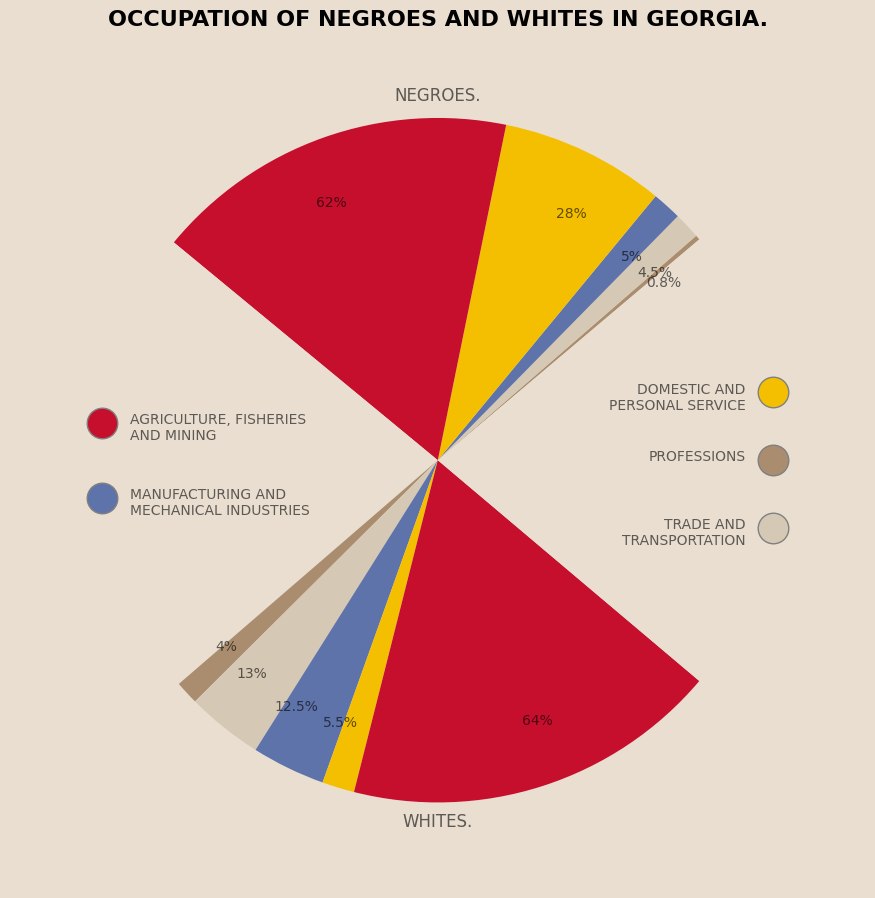

In [10]:
# Create a list of colors based on the Occupation column
colors = [color_dict[occ] for occ in df['Occupation']]

# Create figure and set background color
fig, ax = plt.subplots(figsize=(8.11,10.24), facecolor='#e9ded0')

# Adjust Axes to occupy 105% width and height
ax.set_position([0, -0.02, 1.055, 1.055])

# Pie chart
wedges,txt=ax.pie(df['Percentage'], colors=colors, startangle = startangle, labels=labels_pct, labeldistance=0.8)

# Apply alpha to label fonts
for text in txt:
    text.set_alpha(0.6)           

## Legend
# Horizontal position
x=0.98

# Vertical offset
y=0.11

# Horizontal text offset
tx=0.08

# Vertical text offset
ty=0.03

# List of coordinate pairs
xys = [(x,0),(x,-1.8*y),(-x,-y),(x,1.8*y), (-x,y)]

# Wrap each label with custom widths
custom_wrapped_labels = {
    'AGRICULTURE, FISHERIES AND MINING': "\n".join(textwrap.wrap('AGRICULTURE, FISHERIES AND MINING', width=22)),
    'MANUFACTURING AND MECHANICAL INDUSTRIES': "\n".join(textwrap.wrap('MANUFACTURING AND MECHANICAL INDUSTRIES', width=22)),
    'DOMESTIC AND PERSONAL SERVICE': "\n".join(textwrap.wrap('DOMESTIC AND PERSONAL SERVICE', width=16)),
    'PROFESSIONS': 'PROFESSIONS',
    'TRADE AND TRANSPORTATION': "\n".join(textwrap.wrap('TRADE AND TRANSPORTATION', width=16)),
}

# Plot legend
for i,xy in enumerate(xys):
    plt.plot(xy[0], xy[1], "o", color=colors[i], markeredgecolor='grey',markersize=22)
    
    # Use of custom wrapped labels
    wrapped_label = custom_wrapped_labels[labels[i]]
    
    if i in (2,4):
        txt = ax.text(xy[0]+tx, xy[1]+ty, wrapped_label, ha='left', fontsize=10, alpha=0.6,
                 va='top', bbox=dict(boxstyle='round', facecolor='none', edgecolor='none'))
    else:
        txt = ax.text(xy[0]-tx, xy[1]+ty, wrapped_label, ha='right', fontsize=10, alpha=0.6,
                 va='top', bbox=dict(boxstyle='round', facecolor='none', edgecolor='none'))
    
# Annotations
ax.text(0, 1.05, 'NEGROES.', alpha=0.6, fontsize=12, ha='center')
ax.text(0, -1.07, 'WHITES.', alpha=0.6, fontsize=12, ha='center')

# Title
ax.set_title('OCCUPATION OF NEGROES AND WHITES IN GEORGIA.', fontsize=16, fontweight='bold', pad=5)

# Save the figure
plt.savefig("plate27.jpg")

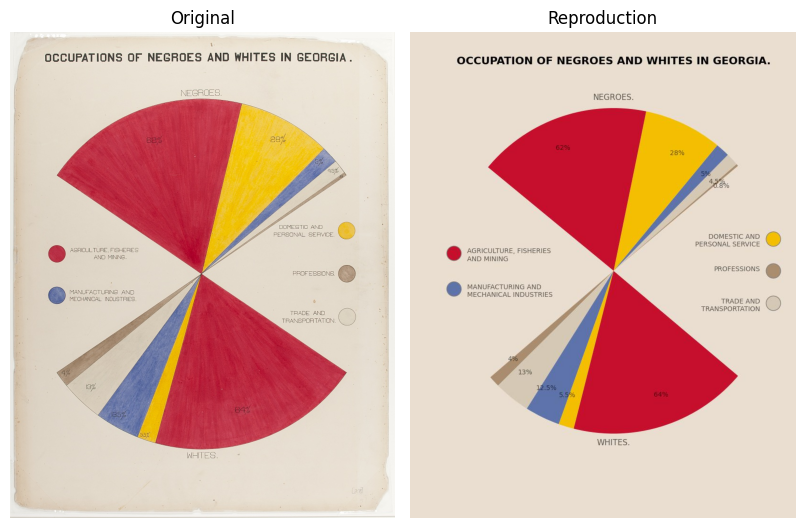

In [11]:
# Load the images
image1 = Image.open("/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge03/original-plate-27.jpg")
image2 = Image.open("plate27.jpg")

# Convert the images to a numpy array 
image_np1 = np.array(image1)
image_np2 = np.array(image2)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.15, 10.24))

# Left subplot
ax1.imshow(image_np1)
# Turn off axis for the image
ax1.axis('off')  
# Set title
ax1.set_title('Original')

# Right subplot
ax2.imshow(image_np2)
# Turn off axis for the image
ax2.axis('off')  
# Set title
ax2.set_title('Reproduction')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()